In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
import plotly.express as px

In [3]:
df = pd.read_csv(r'C:\Users\tyagir01\Desktop\Train_SU63ISt.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('D').mean()

C:\Users\tyagir01\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [5]:
df.tail()

,ID,Count
Datetime,,
2014-09-21,18179.5,379.250000
2014-09-22,18203.5,588.166667
2014-09-23,18227.5,554.333333
2014-09-24,18251.5,702.333333
2014-09-25,18275.5,589.666667


In [6]:
import plotly as py
import plotly.graph_objs as go 
py.offline.init_notebook_mode(connected=True)

In [7]:
x = df.index
y = df.Count
layout = go.Layout(
    title = 'Tickets Sales'
)

trace = go.Scatter(
    x = x,
    y = y
)

fig = go.Figure(data = [trace], layout = layout)
py.offline.iplot(fig)

In [8]:
fig = px.line(df, x=df.index, y='Count', title = 'Ticket Sales')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(count = 2, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 3, label = '3M', step = 'month', stepmode = 'backward'),
            dict(step='all')      
        ])
    )
)
fig.show()

In [9]:
df.describe()

,ID,Count
count,762.000000,762.000000
mean,9143.500000,138.958115
std,5282.753827,135.911437
min,11.500000,2.416667
25%,4577.500000,24.250000
50%,9143.500000,99.125000
75%,13709.500000,215.958333
max,18275.500000,702.333333


In [10]:
#Plotting data
df_train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
df_test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

NameError: name 'df_train' is not defined

In [9]:
import pmdarima as pm
model = pm.auto_arima(df.Count, m=7, seasonal=True, start_p = 0, start_q=0, max_order = 7, test='adf', error_action='ignore',suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=7507.061, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=8178.504, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=7718.595, Time=0.54 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=7929.500, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=8176.670, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=7953.317, Time=0.20 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=7752.975, Time=0.26 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=7508.872, Time=1.16 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=7508.864, Time=1.43 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=7839.268, Time=0.68 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=7640.138, Time=0.62 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=2.36 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=7467.499, Time=0.82 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=7946.252, Time=0.30 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : 

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  762
Model:             SARIMAX(4, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -3644.256
Date:                           Fri, 28 Aug 2020   AIC                           7304.511
Time:                                   22:30:04   BIC                           7341.588
Sample:                                        0   HQIC                          7318.788
                                           - 762                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5164      0.021     24.330      0.000       0.475       0.558
ar.L2         -0.0976      0.030     -3.272      0.001      -0.156      -0.039
ar.L3          0.1300      0.030      4.304      0.000       0.071       0.189
ar.L4         -0.0763      0.030     -2.557      0.011      -0.135      -0.018
ma.L1         -0.9702      0.011    -90.205      0.000      -0.991      -0.949
ar.S.L7        0.9952      0.004    237.434      0.000       0.987       1.003
ma.S.L7       -0.8186      0.018    -46.184      0.000      -0.853      -0.784
sigma2       836.9957     19.992     41.867      0.000     797.812     876.179
===================================================================================
Ljung-Box (Q):                       66.59   Jarque-Bera (JB):              4070.53
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):              44.87   Skew:                             1.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
from pmdarima.model_selection import train_test_split
train, test = train_test_split(df, train_size = 641)

In [13]:
model.fit(train.Count)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 0, 1, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [15]:
test_predictions = model.predict(test.shape[0])

In [16]:
forecast_df = pd.DataFrame(test_predictions, index = test.index, columns=['Predicted Sales'])
forecast_df.head()

,Predicted Sales
Datetime,
2014-05-28,329.261384
2014-05-29,319.095435
2014-05-30,300.332616
2014-05-31,219.402649
2014-06-01,195.827190


In [17]:
from sklearn.metrics import mean_squared_error
print('Auto_Arima Model RMSE:{}'.format(np.sqrt(mean_squared_error(test['Count'], forecast_df['Predicted Sales']))))

NameError: name 'df_test' is not defined

In [69]:
rms = np.sqrt(mean_squared_error(df_test['Count'], forecast_df['Predicted Sales']))
rms

85.53819880036157

<Figure size 864x720 with 0 Axes>

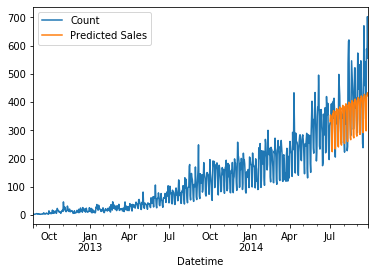

In [70]:
plt.figure(figsize=(12, 10))
pd.concat([df.Count, forecast_df], axis=1).plot()

In [71]:
import statsmodels.api as sm 

In [72]:
fit = sm.tsa.statespace.SARIMAX(df_train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()

In [78]:
forecasts = fit.predict(start='2014-06-01', end='2014-09-25', dynamic=True)
forecasts

2014-06-01    190.749139
2014-06-02    313.220917
2014-06-03    316.401652
2014-06-04    339.847712
2014-06-05    320.039536
                 ...    
2014-09-21    273.338115
2014-09-22    390.796547
2014-09-23    395.078538
2014-09-24    419.323408
2014-09-25    400.361426
Freq: D, Length: 117, dtype: float64

In [79]:
forecast_df = pd.DataFrame(forecasts, index = df_test.index, columns=['Predicted Sales'])
forecast_df

,Predicted Sales
Datetime,
2014-07-01,331.221411
2014-07-02,355.494953
2014-07-03,336.474600
2014-07-04,313.093382
2014-07-05,232.076264
...,...
2014-09-21,273.338115
2014-09-22,390.796547
2014-09-23,395.078538


In [80]:
from sklearn.metrics import mean_squared_error
print('SARIMAX Model MSE:{}'.format(mean_squared_error(df_test['Count'], forecast_df['Predicted Sales'])))

SARIMAX Model MSE:9552.073670242256


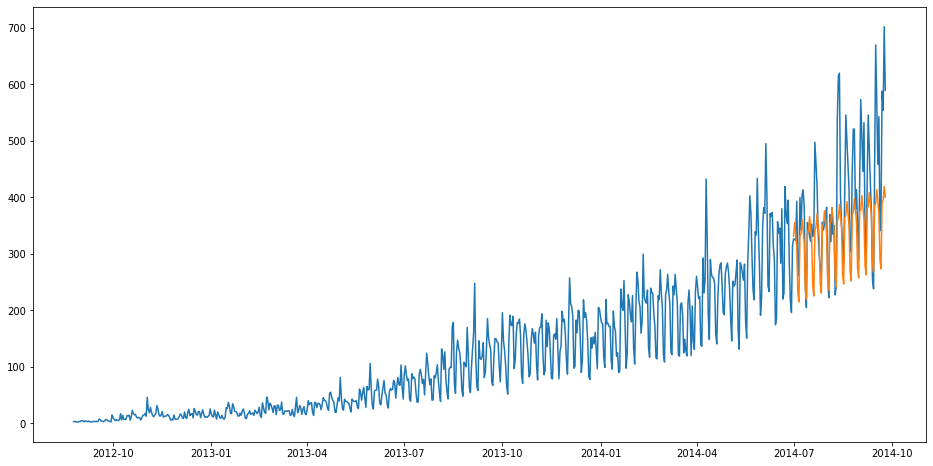

In [81]:
plt.figure(figsize=(16,8))
df_res = pd.concat([df.Count, forecast_df], axis=1)
plt.plot(df_res.Count)
plt.plot(df_res['Predicted Sales'])
plt.show()

In [82]:
rms = np.sqrt(mean_squared_error(df_test.Count, forecast_df['Predicted Sales']))
print(rms)

97.73471067252544
